# Fundamentals of Machine Learning Part 1

### NETID: solution

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Import the data. Make sure that lecture4data.csv is in the same folder as this file!
original_data = pd.read_csv('lecture4data.csv')

# Problem  1: Python Practice

In [ ]:
problem_1_data = original_data.copy()

### a) Print out the first few rows of `problem_1_data`

In [ ]:
problem_1_data.head()

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings
0,Alabama A & M University,Normal,AL,0.6538,4505,20809,0.1104,49720.22,29900
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200
2,University of Alabama in Huntsville,Huntsville,AL,0.8120,5829,20999,0.1848,58688.62,45600
3,Alabama State University,Montgomery,AL,0.4639,4740,18100,0.1216,46065.20,26700
4,The University of Alabama,Tuscaloosa,AL,0.5359,31005,27205,0.4135,57928.41,42700


### b) Add a new column to `problem_1_data` called `education_profit_ratio` that holds each schools' `median_earnings` divided by its `cost`.

In [ ]:
problem_1_data["education_profit_ratio"] = problem_1_data["median_earnings"]/problem_1_data["cost"]
problem_1_data.head()

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings,education_profit_ratio
0,Alabama A & M University,Normal,AL,0.6538,4505,20809,0.1104,49720.22,29900,1.436878
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200,1.808204
2,University of Alabama in Huntsville,Huntsville,AL,0.8120,5829,20999,0.1848,58688.62,45600,2.171532
3,Alabama State University,Montgomery,AL,0.4639,4740,18100,0.1216,46065.20,26700,1.475138
4,The University of Alabama,Tuscaloosa,AL,0.5359,31005,27205,0.4135,57928.41,42700,1.569564


### c) (OPTIONAL) Briefly describe what `cost_single_brackets`, `cost_double_brackets`, and `multiple_columns` look like (what their shapes/dimensions are).

<b>Hint</b>: You can use Python's `type` function to tell the type of an objective. For example, `print(type(dylanIsCool))` will print out the type of `dylanIsCool`. You can also try printing out the object to see what it looks like.

In [ ]:
multiple_columns = problem_1_data[['cost', 'median_earnings']]
cost_single_brackets = problem_1_data['cost']
cost_double_brackets = problem_1_data[['cost']]

ANSWER: `multiple_columns` is a dataframe (2-dimensional) with 2 columns. `cost_double_brackets` is a dataframe (2-dimensional) with 1 column. `cost_single_brackets` is a single column (1-dimensional!).

# Basics of Machine Learning

So far we have discussed the importance of data visualization and data preprocessing. These steps are important in preparing the datasets. Now, we will start our machine learning section of the course. We have already discussed how a machine learning model is like a function, and we will now explain a bit more using __linear regression__ models. Before we begin, we should import some useful python.

This dataset contains information on different colleges across the US. The full dataset was assembled from https://collegescorecard.ed.gov/data/ and this version was trimmed down to a few important columns and cleaned to removed schools with missing data.

We will look at adm_rate (admission rate), undergrads (number of undergrads), cost (cost to attand the college for a year), compl_4 (percent of students graduated in 4 years), median_hh_inc (median household income of students), and median_earnings (median earnings 10 years after starting college).

We want to predict median_earnings using other columns in the data set. In other words, we have some inputs from the dataframe (such as cost), and we want to output another column in the dataframe (median_earnings).

# Section 1: Intro

To keep things clean throughout this Jupyter Notebook, in each section, we first make a copy of the original data. You won't have to do this in your own projects.

In [ ]:
section_1_data = original_data.copy()
section_1_data.head()

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings
0,Alabama A & M University,Normal,AL,0.6538,4505,20809,0.1104,49720.22,29900
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200
2,University of Alabama in Huntsville,Huntsville,AL,0.8120,5829,20999,0.1848,58688.62,45600
3,Alabama State University,Montgomery,AL,0.4639,4740,18100,0.1216,46065.20,26700
4,The University of Alabama,Tuscaloosa,AL,0.5359,31005,27205,0.4135,57928.41,42700


Now, let's start machine learning! We'll choose a set of inputs, and then use machine learning to predict median_earnings using that set of inputs

In [ ]:
inputs = section_1_data[['cost']]
outputs = section_1_data['median_earnings']

In [ ]:
print(type(inputs))
inputs.head(5)

<class 'pandas.core.frame.DataFrame'>


,cost
0,20809
1,22232
2,20999
3,18100
4,27205


In [ ]:
print(type(outputs))
outputs[:5]

<class 'pandas.core.series.Series'>


0    29900
1    40200
2    45600
3    26700
4    42700
Name: median_earnings, dtype: int64

In [ ]:
ML_object_that_predicts = LinearRegression()

We called a function in sklearn called `LinearRegression` and stored the result in `ML_object_that_predicts`. `ML_object_that_predicts` is an object with several useful functions. You can access these functions through `ML_object_that_predicts.<insert function name here>`. As its name implies, we'll use these functions to make predictions.

To do this, we're use the `fit` function and `predict` functions. We'll go into what fitting is later. To predict, give `ML_object_that_predicts` a set of inputs, and it'll spit out a set of predictions based on those inputs.

In [ ]:
known_input, future_input, known_output, future_output = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

ML_object_that_predicts.fit(known_input, known_output) # tell it known stuff

predictions = ML_object_that_predicts.predict(future_input) # given future input, predict future output!

# compare actual median_earnings and the predicted median_earnings
pd.DataFrame({"REAL median_income":future_output, "PREDICTED median_income":predictions}).reset_index(drop=True).head(10)

,REAL median_income,PREDICTED median_income
0,36200,35659.150942
1,42700,44239.451395
2,42500,37177.409277
3,42800,42462.534625
4,35200,45324.623556
5,45800,41478.088340
6,49200,48904.428228
7,31100,44439.499303
8,43900,36473.381025
9,21400,42818.760286


Now we'll call the `score` function of `ML_object_that_predicts`. This returns a "score", which is a measure of how accurate the predictions are. The best score is 1, and negative scores are really bad.

In [ ]:
print("Score:", ML_object_that_predicts.score(future_input, future_output))

Score: 0.17036266107284004


Let's quickly visualize what we just did. The blue points are the true values, and the black points (which are close together, so they look like a line) are our predictions. Our predictions aren't super accurate, but they're somewhat close for most points.

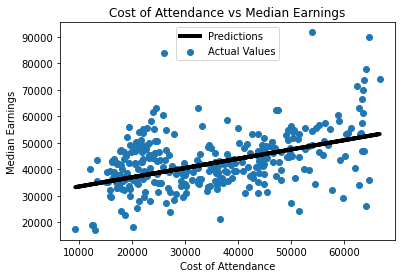

In [ ]:
plt.scatter(future_input, future_output)
plt.plot(future_input, predictions, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Cost of Attendance vs Median Earnings')
plt.xlabel('Cost of Attendance')
plt.ylabel('Median Earnings')
plt.show()

### Summary:

sklearn has an object called `ML_object_that_predicts`. We "fit" it on some inputs and outputs. Then, we give `ML_object_that_predicts` some more inputs, and it predicts outputs.

### What we don't know:

What's "fitting"?

Why do we split the dataset up?

How does the model make predictions?

How do we increase the model's score (how do we make our model better)?

# Section 2: Fitting / Training

In [ ]:
section_2_data = original_data.copy()

The inputs are called "features", and the output is called the "target".

`ML_object_that_predicts` is a "model"

In [ ]:
features = section_2_data[['cost']]
target = section_2_data['median_earnings']
model = LinearRegression()

In reality, we will train a model on known data, and that model is our product -- we're done with it, and we ship it out to be used. The user will give it new data, and the model will predict the corresponding outputs.
We emulate that by splitting our data into "known" data and "new" data. There're a lot of synonyms for known data and new data, and we'll introduce a couple today.

In [ ]:
from sklearn.model_selection import train_test_split
known_data, new_data, known_output, goal_output = train_test_split(features, target, test_size=0.2, random_state=42)

# Here, we call the values we are trying to predict the "goal_output".
# Our goal is to make a model that, when given known_output, can try to predict goal_output.

model.fit(known_data, known_output) # train/fit on known inputs
predictions = model.predict(new_data) # predict on new data

print("Score:", model.score(new_data, goal_output))

Score: 0.17036266107284004


### Summary
`LinearRegression()` returns a "model", which is an object that we first train, then use to predict values. To train, we call `model.fit` with known features and their corresponding outputs. To predict, we call `model.predict` on some new set of data, which it wasn't trained on

### What we still don't know

How does the model make predictions?

How do we increase the model's score (how do we make our model better)?

# Section 3: Models

In [ ]:
section_3_data = original_data.copy()

In [ ]:
features = section_3_data[['cost','adm_rate']]
target = section_3_data['median_earnings']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Running the following cell will pull up a description of `model`.

In [ ]:
# if the popup annoys you, then feel free to comment out the following line
model?

In [ ]:
model.coef_

array([ 3.14511519e-01, -8.76543392e+03])

In [ ]:
model.intercept_

37049.9720095168

`model` is a linear regression model of the form $y = B_1*x_1 + B_2*x_2 + k$, where:

$y = $ median_earnings, our target

$x_1 = $ cost

$B_1 = 3.14511519e-01$, the coefficient on cost

$x_2 = $ admission rate

$B_2 = -8.76543392e+03$, the coefficient on admission rate

$k = 37049.972$, the intercept. 

We won't talk too much about the intercept in this class, but if you're interested in learning more, feel free to ask us after class.

Say you have information about a school's cost and admission rate. Then, `model` can use the school's cost and admission rate to predict the school's median earnings. How does it do that? It calculates $predicted\_median\_earnings = B_1*cost + B_2 * x_2$

Let's try this out on an example.

In [ ]:
section_3_data.loc[1:1]

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200


In [ ]:
example_cost = 22232
example_admission_rate = 0.6043

In [ ]:
B1 = model.coef_[0]
B2 = model.coef_[1]
k = model.intercept_
manually_predicted_median_earnings = B1 * example_cost + B2 * example_admission_rate + k
print(manually_predicted_median_earnings)

38745.240382799544


In [ ]:
model.predict([[example_cost,example_admission_rate]])[0]

38745.240382799544

The two results were the same. From this, we can conclude that `model.predict` is really just outputting $B_1*x_1 + B_2*x_2 + k$.

(When we look at other algorithms in later lectures, the equation will be different. However, the general idea is the same: `model.fit` created an equation, and `model.predict` uses that equation)

### Summary
Our `model` is an object. When we train it (by calling `model.fit`), we're setting its parameters (for example, $B_1$, $B_2$, and k). When we predict (by calling `model.predict(new_data)`), `model` is applying a function to each row of `new_data` in order to get a prediction.


### What we still don't know

How do we increase the model's score (how do we make our model better)?

## Problem 2

Use 'cost' and 'compl_4' to predict 'median_earnings'.

Use a train test split of 25% as a test set (not 20%, which all the previous examples used).

Print out the median_earnings predicted for the test set. Also print out the model's score.

In [ ]:
problem_2_data = original_data.copy()

In [ ]:
# Fill in this cell with your code. We've provided helpful psuedocode.

# define X = the cost and compl_4 columns
# define Y = median_earnings
X = problem_2_data[["cost", "compl_4"]]
Y = problem_2_data["median_earnings"]

# split X and Y into train and test sets (using sklearn)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# create your model
model = LinearRegression()

# fit your model
model.fit(x_train, y_train)

# predict and print out the median earnings for the test set

predictions = model.predict(x_test)
print(predictions)

# print out the score
print(model.score(x_test,y_test))

[34997.04553837 40256.77765219 36515.00222188 40065.94056499
 44154.6934188  37254.56657716 50543.4358826  45179.32647619
 36408.60305709 36817.82228584 40065.94056499 37056.95204229
 53946.90604725 49254.41848669 51712.07655223 49032.21209898
 46908.8813621  51634.6341556  42300.47942943 41813.84612823
 33581.06087747 33071.38024374 46654.57772052 39656.77944005
 36086.95923921 37797.68826651 39504.54887513 50183.53777102
 51630.8031542  50461.5567993  54411.09032731 40428.69902454
 36143.17724212 47107.54551819 39939.12843613 37732.33921404
 40963.5059981  43360.91288529 43085.24326991 35360.96836111
 45711.53688403 43862.25735599 32174.20452243 46505.84916083
 46096.52850278 39766.37228004 52078.68038569 37814.02579968
 34656.84224576 48040.35509604 46632.79492283 45060.08642795
 35833.58470056 35374.3216453  39245.62673988 35006.59729147
 41012.98677008 45827.96939854 45173.66420357 44056.14779597
 41904.00741416 35627.82155062 53786.50267633 41239.5093921
 45376.9463462  32709.898

# Section 4: Validation and Testing

In [ ]:
section_4_data = original_data.copy()

In [ ]:
X = section_4_data.drop(["name","median_earnings"], axis=1) # use all columns except name and median_earnings
X = pd.get_dummies(X) # transform categorical columns so we can use them in linear regression
Y = section_4_data["median_earnings"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.7699638511855351
validation score: -93723982778462.66


## Problem 3

### Replace the 'None' values below with appropriate values to create a train-validate-test split.

In [ ]:
problem_3_data = original_data.copy()
X = problem_3_data[["cost"]] # TODO
Y = problem_3_data["median_earnings"]
x_not_test, x_test, y_not_test, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # TODO
x_train, x_valid, y_train, y_valid = train_test_split(x_not_test, y_not_test, test_size=0.2, random_state=42) # TODO

model = LinearRegression()

# training
model.fit(x_train, y_train) # TODO

print("training score:", model.score(x_train,y_train))
print("validation score:", model.score(x_valid,y_valid))

training score: 0.19366896107689402
validation score: 0.18357286237483061


In [ ]:
print("testing score:", model.score(x_test,y_test))

testing score: 0.16982795845022036


## Problem 4

Use 'median_earnings' to predict 'median_earnings'.

Remember to create a train-test split (use whatever percentage of test set you want).

Print out the coefficients. Print out the model's score. Briefly explain why you got the coefficients and accuracy that you got.

In [ ]:
problem_4_data = original_data.copy()

In [ ]:
# split data and create model
X = problem_4_data[["median_earnings"]]
Y = problem_4_data["median_earnings"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# print out coefficient and score
print("coefficient:", model.coef_)
print("score:", model.score(x_test,y_test))

coefficient: [1.]
score: 1.0


#### Briefly explain why you got the coefficients and score that you got. 

ANSWER: The coefficient was 1, because the input (median_earnings) is one times the output (median_earnings). Because this relationship exists, we got a perfect score of 1. However, note that this linear regression is nonsensical; there's no reason we'd use machine learning to predict median_earnings if we already know the median_earnings.

## Problem 5 (optional)

Linear regression does well with variables that are correlated. Look up how to print out the correlation matrix of a pandas dataframe.

Looking at the correlation matrix, pick at least 3 features that have a low (between -0.5 and 0.5) correlation with median_earnings and plot scatterplots of each of them against median_earnings.
Using these scatterplot, pick one of the features and try a few transformations that might increase its correlation with median_earnings. That is, create new features (columns) and see what their correlation with median_earnings is.

Create a model using one of these new features, as well as other features that are well correlated with median_earnings, as features. Print out the score.

In [ ]:
problem_5_data = original_data.copy()

In [ ]:
# print out correlation matrix

In [ ]:
# make scatter plots

In [ ]:
# create new features

In [ ]:
# create model

In [ ]:
# get score